In [1]:
%matplotlib widget
from scipy import constants
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

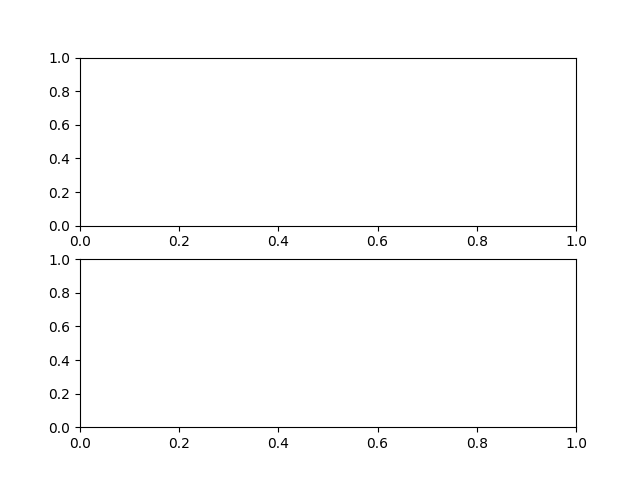

In [2]:
_, axs = plt.subplots(2)
    
def showPlot():
    
    for ax in axs:
    
        ax.clear()
        ax.spines['left'].set_position('zero')

        # turn off the right spine/ticks
        ax.spines['right'].set_color('none')
        ax.yaxis.tick_left()

        # set the y-spine
        ax.spines['bottom'].set_position('zero')

        # turn off the top spine/ticks
        ax.spines['top'].set_color('none')
        ax.xaxis.tick_bottom()
    
    axs[0].plot(np.array(psi)[:,0], np.array(psi)[:,1])
    
    axs[1].plot(np.array(psi)[:,0], abs(np.array(psi)[:,1])**2)
    
    plt.show()

In [3]:
iterations = 1
deltaR = 1

@interact(radius=widgets.FloatLogSlider(description="Max Radius", value=1e-9, base=10, min=-12, max=-8), radiusStep=widgets.FloatLogSlider(description=r'$\Delta$r', value=1e-12, base=10, min=-15, max=-10))
def setIterations(radius, radiusStep):
    global iterations
    global deltaR
    deltaR = radiusStep
    iterations = int(radius/radiusStep)
    print("hi")

interactive(children=(FloatLogSlider(value=1e-09, description='Max Radius', max=-8.0, min=-12.0), FloatLogSlid…

In [4]:
almostZero = 10e-15

psi2 = [[almostZero, 0]]
psi1 = [[almostZero, 1]]
psi = [[almostZero, 0]]

def clearData():
    global psi2
    psi2 = [[almostZero, 0]]
    global psi1
    psi1 = [[almostZero, 1]]
    global psi
    psi = [[almostZero, 0]]

def Wpot(r):
    return - constants.e**2 / (4 * constants.pi * constants.epsilon_0 * r)

@interact(weV=widgets.FloatText(description="Energy / eV", min=0, max=20, value=14.0873343763323), n=widgets.IntSlider(min=1, max=10))
def calculateSchrödi(weV, n):
    w = -(weV) * constants.e * 1/(n**2)
    print("n=1: 14,0873343763323\nn=2: 13.8408111111111")
    
    clearData()
    
    for i in range(1, iterations + 1):
        r = almostZero + i * deltaR
        
        #psi
        newPsi = psi1[i-1][1] * deltaR + psi[i-1][1]
        psi.append([r, newPsi])
        
        #psi1
        newPsi1 = psi2[i-1][1] * deltaR + psi1[i-1][1]
        psi1.append([r, newPsi1])
        
        #psi2        
        newPsi2 = -(8 * (constants.pi**2) * constants.m_e) / (constants.h**2) * (w - Wpot(r)) * psi[i][1]
        psi2.append([r, newPsi2])
        
    showPlot()
    

interactive(children=(FloatText(value=14.0873343763323, description='Energy / eV'), IntSlider(value=1, descrip…